** 스마트워치 센서 데이터 기반 행동 분류 3일차 **
# --------- 미션5 : 모델 검증 ---------

### (0) 미션 이해하기
   * 그동안 XGBoost 알고리즘을 튜닝해 train 데이터셋에 대한 최고의 행동패턴 분류 모델을 만들었습니다.
   * 이제 test 데이터셋을 사용하여 그동안 만들고 튜닝해온 모델에 데이터를 학습시켜 정확도를 확인 하겠습니다.
   * 미션4에서 튜닝한 XGBoost 알고리즘을 사용해 모델을 생성 하고 train 데이터셋 학습결과와 비교해 보세요.<br>
   

<span style="background-color:#fff5b1"><span style="color:black"><U>※ 미션완수 조건: 튜닝된 XGBoost 모델에 test 데이터셋을 학습시킨 정확도와 train 데이터셋을 학습시킨 정확도를 비교해 보세요.<U></span></span>

<span style="background-color:#fff5b1"><span style="color:red"><U>※ 함수/변수명, 데이터 타입 잘 확인하고 코드를 작성하세요 <U></span></span>

---

### (1) 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러이가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> train_data.csv 불러오기 -> 'subject' 제거 -> result4.csv 불러오기

In [11]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

import scipy.stats as spst  # 상관분석 라이브러리

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *





* test 데이터 불러오기

In [22]:
# 'data' 폴더에서 test_data.csv 파일을 불러와서 data 변수에 할당
# 잘 할당 되었는지 상위 5개행 데이터 확인
data = pd.read_csv('./data/test_data.csv')
data.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,22,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,15,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,22,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,8,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,5,STANDING


In [23]:
# data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거
# 'subject'열이 잘 제거 되었는지 확인

data.drop('subject', axis=True, inplace=True)
data



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.509523,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.210792,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.579587,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.566291,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.447577,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.586580,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,SITTING
1467,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.451941,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,STANDING
1468,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.213340,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,WALKING_DOWNSTAIRS
1469,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,0.072602,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,LAYING


* result 데이터 불러오기

In [24]:
# 모델별 정확도를 비교 할 수 있도록 결과 저장 파일 호출 
# result 변수에 'data' 폴더에서 /result4.csv 파일을 불러와서 할당
# 잘 불러와 졌는지 확인

result = pd.read_csv('./data/result4.csv')
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top,0.992635,0.993060


### (2) Feature Selection
* test 데이터를 사용하여 모델을 생성하고 Feature Selection을 적용하여 중요도 상위 feature로 학습시켜 정확도를 높여 보세요.


	- 실습순서: 중요도 데이터프레임 생성-> 데이터 분할/가공 -> Feature Selection(중요도 상위 Features) -> 최적의 Feature Selection 찾기 -> 모델링 -> 결과 저장 

In [15]:
# XGBClassifier 알고리즘 사용을 위한 모듈 추가
# GridSearchCV 모듈을 사용하기 위한 모듈 추가(scikit-learn 라이브러리에 포함)

from sklearn.model_selection import GridSearchCV


In [25]:
# x, y 데이터 나누기 (target = 'Activity')

target = 'Activity'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [26]:
# XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
# y_map 변수를 생성해서 target 데이터(y)를 숫자형 형태로 치환하여 할당
# 데이터 치환 함수: map
# 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5

y_map = y.map({'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5})
y_map

0       1
1       0
2       3
3       1
4       0
       ..
1466    1
1467    0
1468    5
1469    2
1470    5
Name: Activity, Length: 1471, dtype: int64

In [27]:
# x,y_map를 사용하여 학습 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
# random_state=2023

x_train, x_test, y_train, y_test = train_test_split(x,y_map, train_size=0.7, random_state=2023)



* feature 별 중요도 도출을 위한 모델링

In [28]:
# 베스트 파라미터를 적용한 xgb 모델 선언(초기화), 학습, 예측
# AI모델 변수명: xgb_hpt_model 예측결과 변수명: xgb_hpt_pred
# random_state=2023
params = {'learning_rate': 0.3, 'max_depth': 3 }

xgb_hpt_model = XGBClassifier(**params,random_state=2023)
xgb_hpt_model.fit(x_train, y_train)
xgb_hpt_pred = xgb_hpt_model.predict(x_test)
xgb_hpt_pred

array([4, 4, 1, 3, 4, 2, 0, 5, 0, 0, 4, 4, 0, 0, 4, 5, 5, 5, 5, 4, 0, 0,
       2, 4, 3, 5, 3, 4, 4, 5, 2, 3, 2, 1, 1, 4, 4, 2, 3, 3, 2, 1, 4, 3,
       1, 0, 1, 2, 4, 2, 4, 0, 1, 4, 5, 4, 0, 3, 2, 4, 4, 5, 3, 0, 5, 1,
       0, 3, 5, 5, 4, 0, 3, 1, 4, 2, 1, 2, 0, 4, 2, 3, 1, 3, 2, 1, 3, 3,
       2, 4, 3, 1, 5, 2, 3, 0, 3, 3, 1, 0, 0, 5, 4, 0, 0, 3, 0, 2, 4, 4,
       0, 3, 4, 2, 3, 1, 2, 5, 3, 0, 1, 3, 5, 0, 0, 1, 4, 3, 2, 4, 2, 0,
       3, 5, 0, 1, 3, 3, 2, 5, 2, 3, 3, 3, 4, 1, 2, 1, 2, 4, 5, 3, 3, 5,
       1, 0, 3, 4, 2, 1, 3, 2, 4, 2, 3, 0, 3, 4, 5, 0, 0, 3, 2, 5, 5, 3,
       0, 4, 0, 1, 0, 4, 2, 2, 3, 4, 2, 2, 3, 1, 3, 1, 4, 4, 3, 0, 4, 1,
       4, 1, 3, 3, 3, 3, 2, 1, 5, 2, 2, 1, 1, 2, 5, 0, 5, 2, 5, 1, 4, 0,
       3, 1, 1, 5, 4, 3, 2, 0, 5, 2, 2, 3, 2, 4, 5, 1, 2, 4, 0, 1, 1, 3,
       4, 1, 2, 4, 3, 5, 2, 1, 2, 0, 0, 4, 4, 3, 1, 1, 5, 0, 0, 1, 0, 0,
       4, 2, 3, 1, 2, 1, 0, 0, 0, 3, 4, 1, 2, 5, 4, 2, 2, 5, 2, 0, 4, 1,
       4, 1, 5, 4, 0, 5, 5, 1, 1, 0, 4, 0, 3, 2, 1,

In [29]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_test,xgb_hpt_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,xgb_hpt_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,xgb_hpt_pred))

accuracy_score:  0.9705882352941176

 confusion_matrix: 
 [[82  4  0  0  0  0]
 [ 6 66  0  0  0  0]
 [ 0  0 84  0  0  0]
 [ 0  0  0 71  0  2]
 [ 0  0  0  0 67  0]
 [ 0  0  0  0  1 59]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        86
           1       0.94      0.92      0.93        72
           2       1.00      1.00      1.00        84
           3       1.00      0.97      0.99        73
           4       0.99      1.00      0.99        67
           5       0.97      0.98      0.98        60

    accuracy                           0.97       442
   macro avg       0.97      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442



In [30]:
# result 변수에 result 변수(데이터프레임) 마지막에 모델 평가 결과 추가 
# 할당할 정보는 데이터명('test'), 모델명('xgb_hpt'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result = result.append({'data':'test','model_name':'xgb_hpt','accuracy_score':accuracy_score(y_test, xgb_hpt_pred), 'f1_score': f1_score(y_test, xgb_hpt_pred, average = 'macro')}, ignore_index=True)
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top,0.992635,0.993060
9,test,xgb_hpt,0.970588,0.971003


* 변수별 중요도 추출

In [31]:
# importance_sort 데이터프레임 변수 생성 초기화
importance_sort = pd.DataFrame()


In [32]:
# importance_sort['feature_name'] 열에 모델링에 사용한 x 데이터프레임의 컬럼명을 할당

importance_sort['feature_name'] = x.columns
importance_sort

,feature_name
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y
...,...
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"


In [33]:
# importance_sort['feature_importance'] 열에 앞에서 사용한 xgb_hpt_model 모델의 feature_importances 를 할당
# 참고함수: feature_importances_

importance_sort['feature_importance'] = xgb_hpt_model.feature_importances_
importance_sort

,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000844
1,tBodyAcc-mean()-Y,0.000108
2,tBodyAcc-mean()-Z,0.000440
3,tBodyAcc-std()-X,0.001423
4,tBodyAcc-std()-Y,0.000894
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",0.001842
557,"angle(tBodyGyroJerkMean,gravityMean)",0.000000
558,"angle(X,gravityMean)",0.000145
559,"angle(Y,gravityMean)",0.002215


In [34]:
# importance_sort['feature_importance'] 를 내림차순 정열(기준열='feature_importance', 내림차순)
# 참고함수: sort_values

importance_sort.sort_values(by='feature_importance', ascending=False, inplace=True)
importance_sort

,feature_name,feature_importance
166,tBodyGyroJerk-mad()-X,0.138832
516,fBodyBodyAccJerkMag-std(),0.104186
9,tBodyAcc-max()-X,0.040473
40,tGravityAcc-mean()-X,0.037269
296,fBodyAcc-skewness()-X,0.036166
...,...,...
217,tGravityAccMag-min(),0.000000
216,tGravityAccMag-max(),0.000000
383,"fBodyAccJerk-bandsEnergy()-17,24",0.000000
384,"fBodyAccJerk-bandsEnergy()-25,32",0.000000


In [35]:
# feature_importance 내림차순 정렬 때문에 엉킨 인덱스 재설정
# 참고함수: reset_index
# 파라미터: drop=True, inplace=True
# 제대로 정렬 되었는지 데이터 프레임에 확인

importance_sort.reset_index(drop=True, inplace=True)
importance_sort

,feature_name,feature_importance
0,tBodyGyroJerk-mad()-X,0.138832
1,fBodyBodyAccJerkMag-std(),0.104186
2,tBodyAcc-max()-X,0.040473
3,tGravityAcc-mean()-X,0.037269
4,fBodyAcc-skewness()-X,0.036166
...,...,...
556,tGravityAccMag-min(),0.000000
557,tGravityAccMag-max(),0.000000
558,"fBodyAccJerk-bandsEnergy()-17,24",0.000000
559,"fBodyAccJerk-bandsEnergy()-25,32",0.000000


* Feature Selection 을 반복적으로 적용해 최고 정확도의 중요 feature 개수 학습 결과 선별

In [36]:
# acc 데이터 프레임을 생성 및 초기화(컬럼 지정: columns=['accuracy_score'])
# for 문을 사용해 중요도 상위 feature 1개 모델링부터 상위 feature 100개  모델링까지 순차적 모델링 실행 후 각 accuracy_score 결과를 acc 변수에 누적
# 전체 feature는 561개 이지만, 학습에 130개면 충분(약 10분 소요)
# for 매 회 마다 결과 출력(양식: print(acc.loc[i])

acc = pd.DataFrame(columns=['accuracy_score'])

for i in range(130):

    importance_n = importance_sort['feature_name'][:i+1]

    x_train_n = x_train[importance_n]
    x_test_n = x_test[importance_n]

    xgb_n_model = XGBClassifier(learning_rate=0.3, max_depth=3, random_state=2023)
    xgb_n_model.fit(x_train_n, y_train)
    xgb_n_pred = xgb_n_model.predict(x_test_n)
    
    acc.loc[i] = accuracy_score(y_test,xgb_n_pred)
    print(acc.loc[i])

acc    



accuracy_score    0.432127
Name: 0, dtype: float64
accuracy_score    0.556561
Name: 1, dtype: float64
accuracy_score    0.680995
Name: 2, dtype: float64
accuracy_score    0.848416
Name: 3, dtype: float64
accuracy_score    0.848416
Name: 4, dtype: float64
accuracy_score    0.857466
Name: 5, dtype: float64
accuracy_score    0.859729
Name: 6, dtype: float64
accuracy_score    0.893665
Name: 7, dtype: float64
accuracy_score    0.904977
Name: 8, dtype: float64
accuracy_score    0.902715
Name: 9, dtype: float64
accuracy_score    0.909502
Name: 10, dtype: float64
accuracy_score    0.938914
Name: 11, dtype: float64
accuracy_score    0.934389
Name: 12, dtype: float64
accuracy_score    0.945701
Name: 13, dtype: float64
accuracy_score    0.941176
Name: 14, dtype: float64
accuracy_score    0.945701
Name: 15, dtype: float64
accuracy_score    0.952489
Name: 16, dtype: float64
accuracy_score    0.943439
Name: 17, dtype: float64
accuracy_score    0.941176
Name: 18, dtype: float64
accuracy_score    0.94

,accuracy_score
0,0.432127
1,0.556561
2,0.680995
3,0.848416
4,0.848416
...,...
125,0.970588
126,0.968326
127,0.970588
128,0.968326


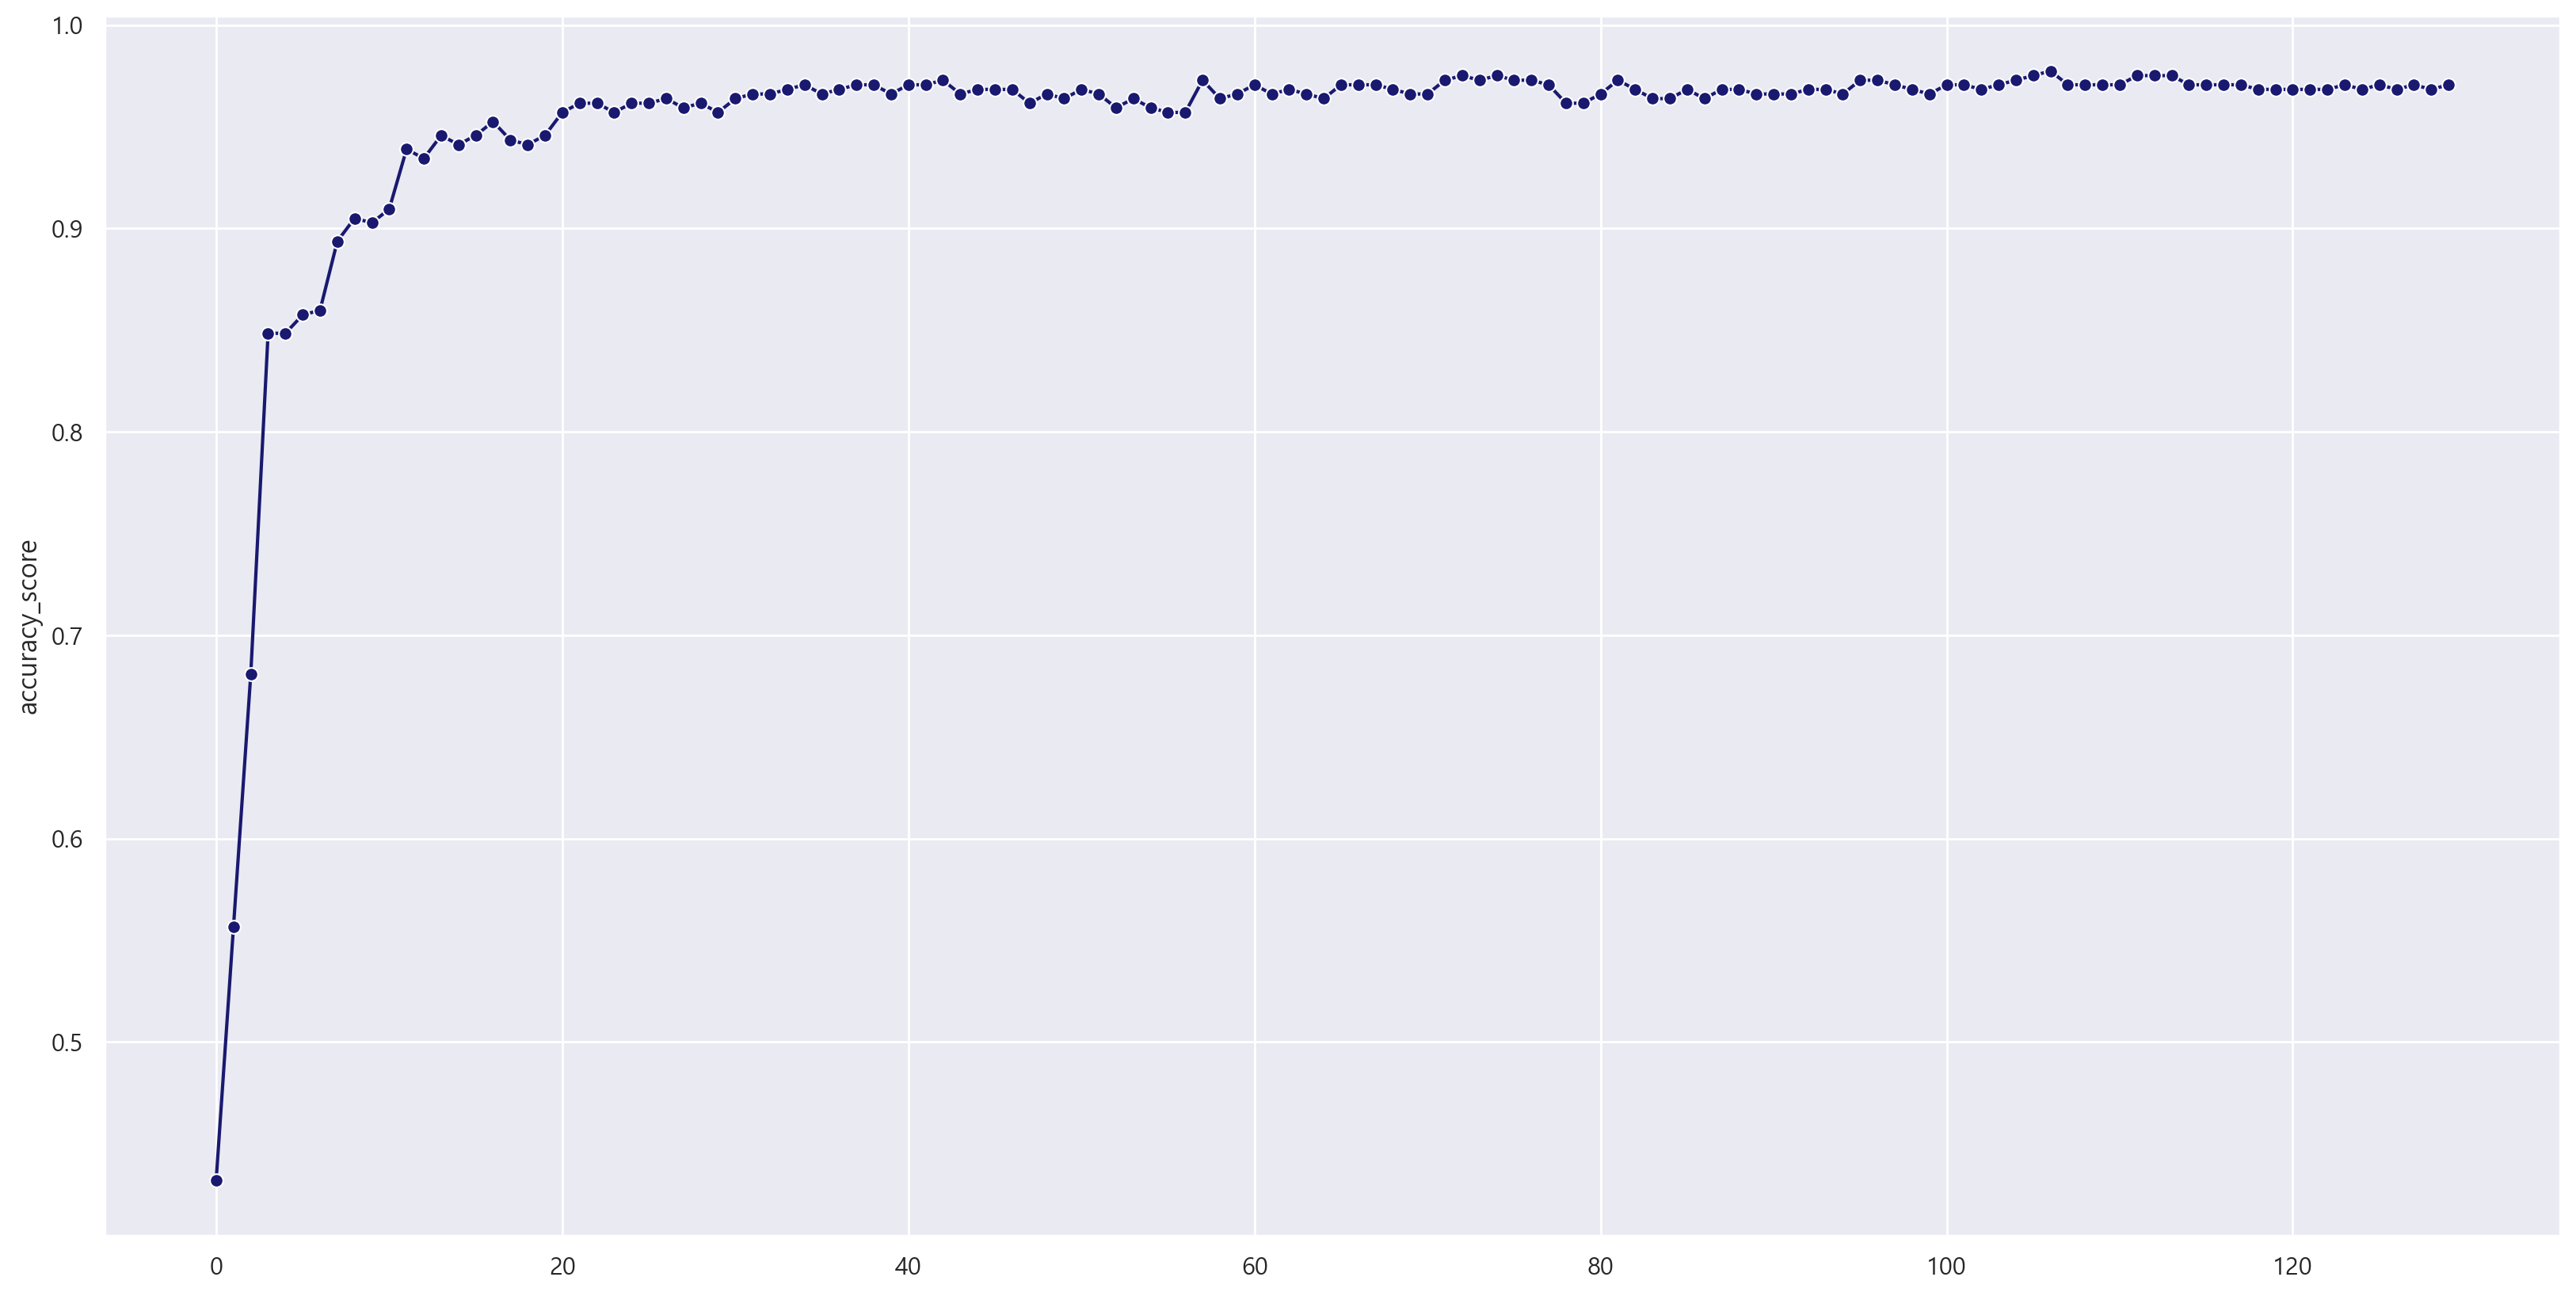

In [38]:
# accuracy_score 누적한 acc 변수 시각화
## 참고 함수: plt.plot

plt.figure(figsize=(20,10))
sns.lineplot(x=acc.index, y='accuracy_score', data=acc, marker='o', color='midnightblue')
plt.show()

* 정확도 최고의 학습 Feature 개수 찾기

In [40]:
# acc 변수를 accuracy_score 기준 내림차순으로 정렬(인덱스 재설정X)
# accuracy_score 값이 가장 높을때의 인덱스명이 학습된 상위 feature 개수를 뜻함

acc.sort_values(by='accuracy_score', ascending=False, inplace=True)
acc

,accuracy_score
106,0.977376
111,0.975113
105,0.975113
72,0.975113
113,0.975113
...,...
4,0.848416
3,0.848416
2,0.680995
1,0.556561


In [42]:
# importance_top 변수에 acc 에서 확인한 상위 feature 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 할당
# 참고: 슬라이싱 할때 [:1] -> index 0 까지 짤림, [:100] -> index 99 까지 짤림, 정확도 최고치 인덱스 값 +1 해서 슬라이싱 할것


importance_top = importance_sort['feature_name'][:acc.index[0]+1]
importance_top

0                tBodyGyroJerk-mad()-X
1            fBodyBodyAccJerkMag-std()
2                     tBodyAcc-max()-X
3                 tGravityAcc-mean()-X
4                fBodyAcc-skewness()-X
                    ...               
102              tBodyGyroJerk-iqr()-Z
103        tBodyGyroJerk-arCoeff()-Y,1
104    fBodyGyro-bandsEnergy()-17,24.2
105        tBodyGyroJerk-arCoeff()-X,1
106      fBodyAcc-bandsEnergy()-9,16.2
Name: feature_name, Length: 107, dtype: object

In [43]:
# 훈련 데이터 생성
# x_train_top 변수에 x_train을 중요 feature 만클 슬라이싱 한 x_train[importance_top] 할당
# x_val_top 변수에 x_val을 중요 feature 만클 슬라이싱 한 x_val[importance_top] 할당

x_train_top = x_train[importance_top]
x_test_top = x_test[importance_top]

In [44]:
# XGBClassifier 모델 초기화,학습,예측
# AI모델 변수명: xgb_top_model , 예측결과 변수명: xgb_top_pred
# random_state=2023
params = {'learning_rate': 0.3, 'max_depth': 3 }

xgb_top_model = XGBClassifier(**params,random_state=2023)
xgb_top_model.fit(x_train_top, y_train)
xgb_top_pred = xgb_top_model.predict(x_test_top)
xgb_top_pred


array([4, 4, 1, 3, 4, 2, 0, 5, 0, 0, 4, 4, 0, 0, 4, 5, 5, 5, 5, 4, 0, 0,
       2, 4, 3, 5, 3, 4, 4, 5, 2, 3, 2, 1, 1, 4, 4, 2, 3, 3, 2, 1, 4, 3,
       1, 0, 0, 2, 4, 2, 4, 0, 1, 4, 5, 4, 0, 3, 2, 4, 4, 5, 3, 0, 5, 1,
       0, 3, 5, 5, 4, 0, 3, 1, 4, 2, 1, 2, 1, 4, 2, 3, 1, 3, 2, 1, 3, 3,
       2, 4, 3, 1, 5, 2, 3, 0, 3, 3, 1, 0, 0, 5, 4, 0, 0, 3, 0, 2, 4, 4,
       0, 3, 4, 2, 3, 0, 2, 5, 3, 0, 1, 3, 5, 0, 0, 1, 4, 3, 2, 4, 2, 0,
       3, 5, 0, 1, 3, 3, 2, 5, 2, 3, 3, 3, 4, 1, 2, 1, 2, 4, 5, 3, 3, 5,
       1, 0, 3, 4, 2, 0, 3, 2, 4, 2, 3, 0, 3, 4, 5, 0, 0, 3, 2, 5, 5, 3,
       0, 4, 0, 1, 0, 4, 2, 2, 3, 4, 2, 2, 3, 1, 3, 1, 4, 4, 3, 0, 4, 1,
       4, 1, 3, 3, 3, 3, 2, 1, 5, 2, 2, 0, 1, 2, 5, 0, 5, 2, 5, 1, 4, 0,
       3, 1, 1, 5, 4, 3, 2, 0, 5, 2, 2, 3, 2, 4, 5, 1, 2, 4, 0, 1, 1, 3,
       4, 1, 2, 4, 3, 5, 2, 1, 2, 0, 0, 4, 4, 3, 1, 1, 5, 0, 0, 1, 0, 0,
       4, 2, 3, 1, 2, 1, 0, 0, 0, 3, 4, 1, 2, 5, 4, 2, 2, 5, 2, 0, 4, 1,
       4, 1, 5, 4, 0, 5, 5, 1, 1, 0, 4, 0, 3, 2, 1,

In [45]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_test,xgb_top_pred))
print('='*50)
print('\n confusion_matrix: \n',confusion_matrix(y_test,xgb_top_pred))
print('='*50)
print('\n classification_report: \n',classification_report(y_test,xgb_top_pred))

accuracy_score:  0.9773755656108597

 confusion_matrix: 
 [[83  3  0  0  0  0]
 [ 4 68  0  0  0  0]
 [ 0  0 84  0  0  0]
 [ 0  0  0 71  0  2]
 [ 0  0  0  0 67  0]
 [ 0  0  0  0  1 59]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        86
           1       0.96      0.94      0.95        72
           2       1.00      1.00      1.00        84
           3       1.00      0.97      0.99        73
           4       0.99      1.00      0.99        67
           5       0.97      0.98      0.98        60

    accuracy                           0.98       442
   macro avg       0.98      0.98      0.98       442
weighted avg       0.98      0.98      0.98       442



In [46]:
# result 변수에 result 데이터프레임 마지막에 모델 평가 결과 추가 (append 함수는 inplace 파라미터가 없음)
# 할당할 정보는 데이터명('test'), 모델명('xgb_top'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result = result.append({'data':'test','model_name':'xgb_top','accuracy_score':accuracy_score(y_test, xgb_top_pred), 'f1_score': f1_score(y_test, xgb_top_pred, average = 'macro')}, ignore_index=True)
result


,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top,0.992635,0.993060
9,test,xgb_hpt,0.970588,0.971003


### (3) 결과 저장 및 시각화

In [47]:
# 인덱스 미포함 result 변수를 result5.csv 파일로 저장
# 저장경로: ./data
# 파일명: result5.csv
result.to_csv('./data/result5.csv', index=False)


In [48]:
# 잘 저장 되었는지 확인
pd.read_csv('./data/result5.csv')

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,knn,0.952408,0.956144
2,train,lr,0.984703,0.986111
3,train,gb,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top,0.992635,0.993060
9,test,xgb_hpt,0.970588,0.971003


*  model_name 별 accuracy_score, f1_score 시각화(수직 그래프) 

In [49]:
# result_comp 변수에 result 데이터프레임의 data, model_name을 컴럼으로 지정 후 할당
# 참고함수: set_index
# 지정 인덱스: ['data','model_name']

result_comp = result.set_index(['data','model_name'])
result_comp

accuracy_score  f1_score
data  model_name                          
train svc               0.968839  0.971715
      knn               0.952408  0.956144
      lr                0.984703  0.986111
      gb                0.981870  0.983141
      xgb               0.990368  0.991052
      xgb_hpt           0.991501  0.992355
      xgb95_hpt         0.992068  0.992371
      xgb50_hpt         0.988669  0.988601
      xgb_top           0.992635  0.993060
test  xgb_hpt           0.970588  0.971003
      xgb_top           0.977376  0.977416

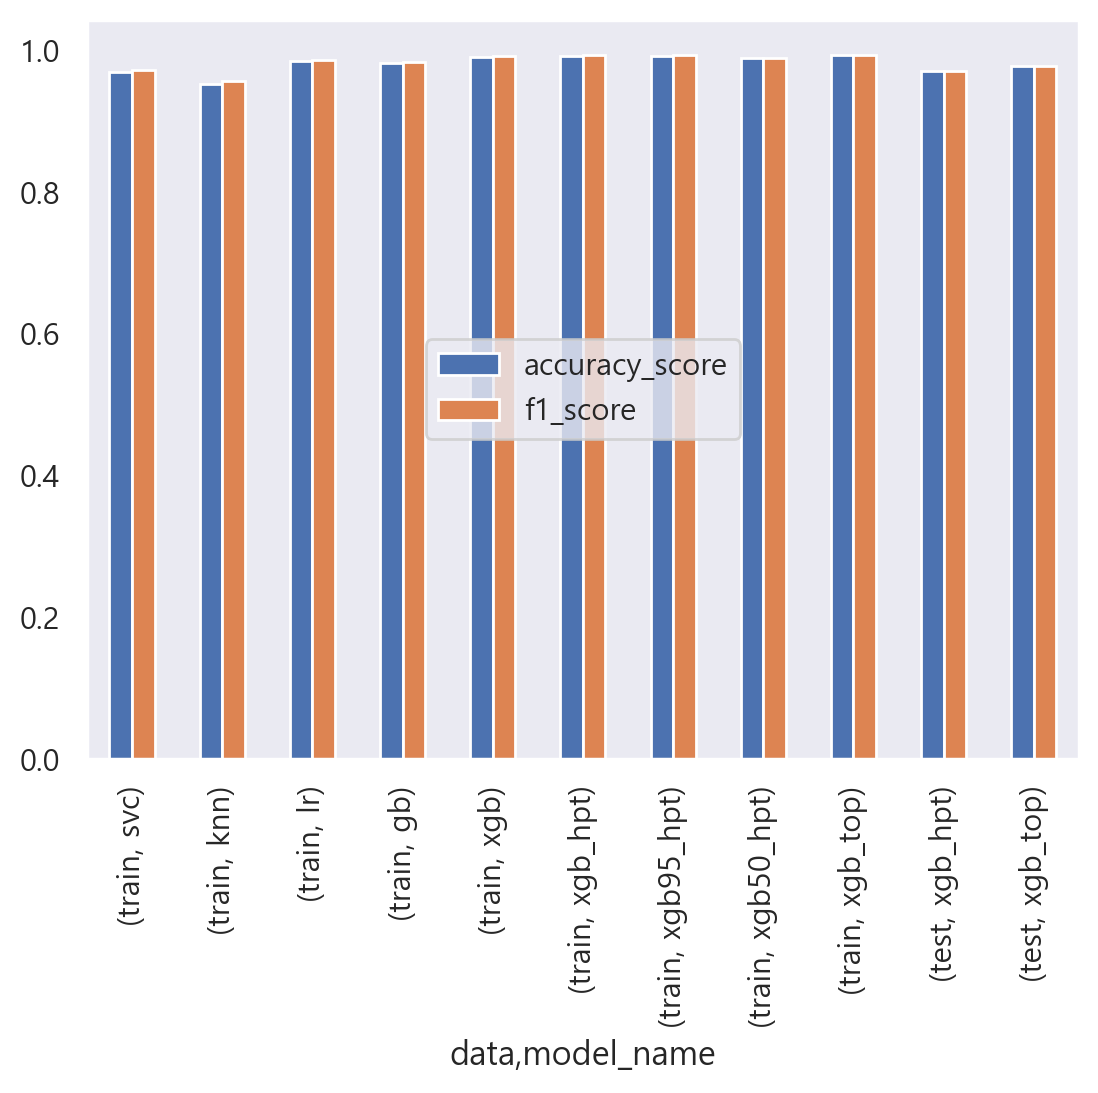

In [50]:
# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화
# grid 추가
# legend 위치 center

result_comp.plot(kind='bar')
plt.grid()
plt.legend(loc='center')
plt.show()


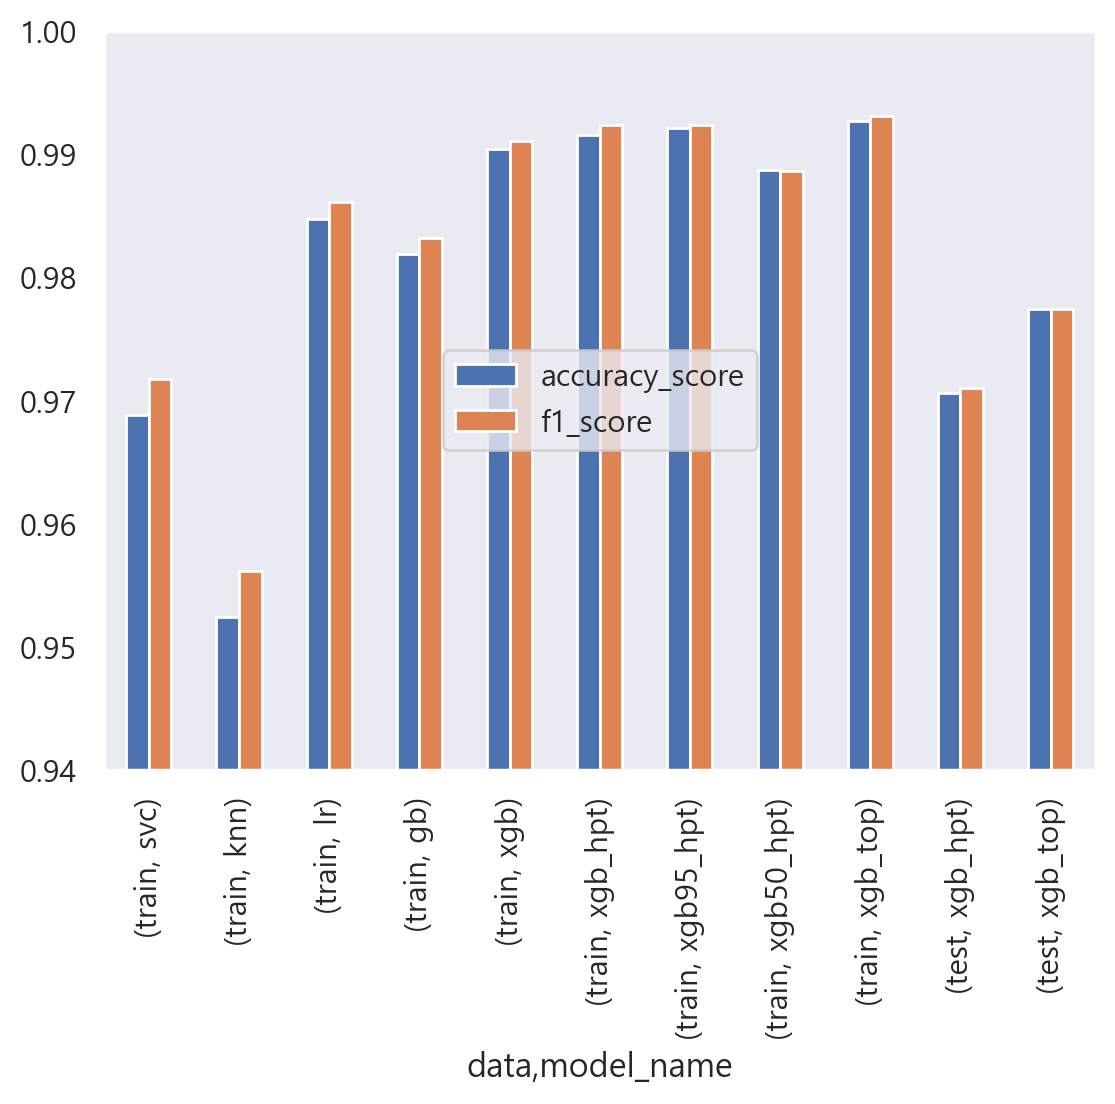

In [53]:
result_comp.plot(kind='bar')
plt.grid()
plt.legend(loc='center')
plt.ylim(0.94,1.0)
plt.show()





---
---